In [54]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import joblib

In [26]:
columns_to_oh_encode = ["CHARSET"]
columns_to_target_encode = ["WHOIS_COUNTRY"]

In [27]:
pipeline = make_pipeline(
    ce.OneHotEncoder(cols=columns_to_oh_encode),
    ce.TargetEncoder(cols=columns_to_target_encode),
    DecisionTreeClassifier(),
)

In [28]:
X_train = pd.read_csv("../data/interim/X_train.csv")
X_test = pd.read_csv("../data/interim/X_Test.csv")
y_train = pd.read_csv("../data/interim/y_train.csv")
y_test = pd.read_csv("../data/interim/y_test.csv")

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1419, 14)
(355, 14)
(1419, 1)
(355, 1)


In [30]:
y_train.head()

,Type
0,0
1,0
2,0
3,0
4,0


In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['CHARSET'])),
                ('targetencoder', TargetEncoder(cols=['WHOIS_COUNTRY'])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [32]:
y_pred = pipeline.predict(X_test)

In [33]:
f1_score(y_true=y_test, y_pred=y_pred)

0.775

In [34]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[306,   7],
       [ 11,  31]])

In [35]:
pipeline.named_steps["decisiontreeclassifier"].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [36]:
features = pipeline.named_steps["decisiontreeclassifier"].feature_importances_

In [37]:
feat_imp = dict(zip(X_train.columns, features))

In [38]:
dict(sorted(feat_imp.items(), key=lambda item: item[1], reverse=True))

{'REMOTE_IPS': 0.413293149811013,
 'URL_LENGTH': 0.11669863371248694,
 'SOURCE_APP_PACKETS': 0.09557310252297946,
 'DNS_QUERY_TIMES': 0.0883890987897045,
 'NUMBER_SPECIAL_CHARACTERS': 0.06223105893585661,
 'REMOTE_APP_PACKETS': 0.035794666192390356,
 'APP_PACKETS': 0.019491897439070437,
 'REMOTE_APP_BYTES': 0.012617253824956624,
 'WHOIS_COUNTRY': 0.011747971454407775,
 'TCP_CONVERSATION_EXCHANGE': 0.009840299499453071,
 'SOURCE_APP_BYTES': 0.0032914575195539023,
 'CHARSET': 0.0,
 'DIST_REMOTE_TCP_PORT': 0.0,
 'APP_BYTES': 0.0}

[Text(0.7488339552238806, 0.9666666666666667, 'x[6] <= 0.226\ngini = 0.214\nsamples = 1419\nvalue = [1246, 173]\nclass = 0'),
 Text(0.5573694029850746, 0.9, 'x[6] <= 0.125\ngini = 0.142\nsamples = 1348\nvalue = [1244, 104]\nclass = 0'),
 Text(0.2826492537313433, 0.8333333333333334, 'x[12] <= 1.0\ngini = 0.082\nsamples = 1078\nvalue = [1032, 46]\nclass = 0'),
 Text(0.2677238805970149, 0.7666666666666667, 'gini = 0.0\nsamples = 413\nvalue = [413, 0]\nclass = 0'),
 Text(0.29757462686567165, 0.7666666666666667, 'x[14] <= 111.0\ngini = 0.129\nsamples = 665\nvalue = [619, 46]\nclass = 0'),
 Text(0.19776119402985073, 0.7, 'x[1] <= 13.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]\nclass = 1'),
 Text(0.1828358208955224, 0.6333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.2126865671641791, 0.6333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = 1'),
 Text(0.39738805970149255, 0.7, 'x[8] <= 1.5\ngini = 0.104\nsamples = 653\nvalue = [617, 36]\nclass 

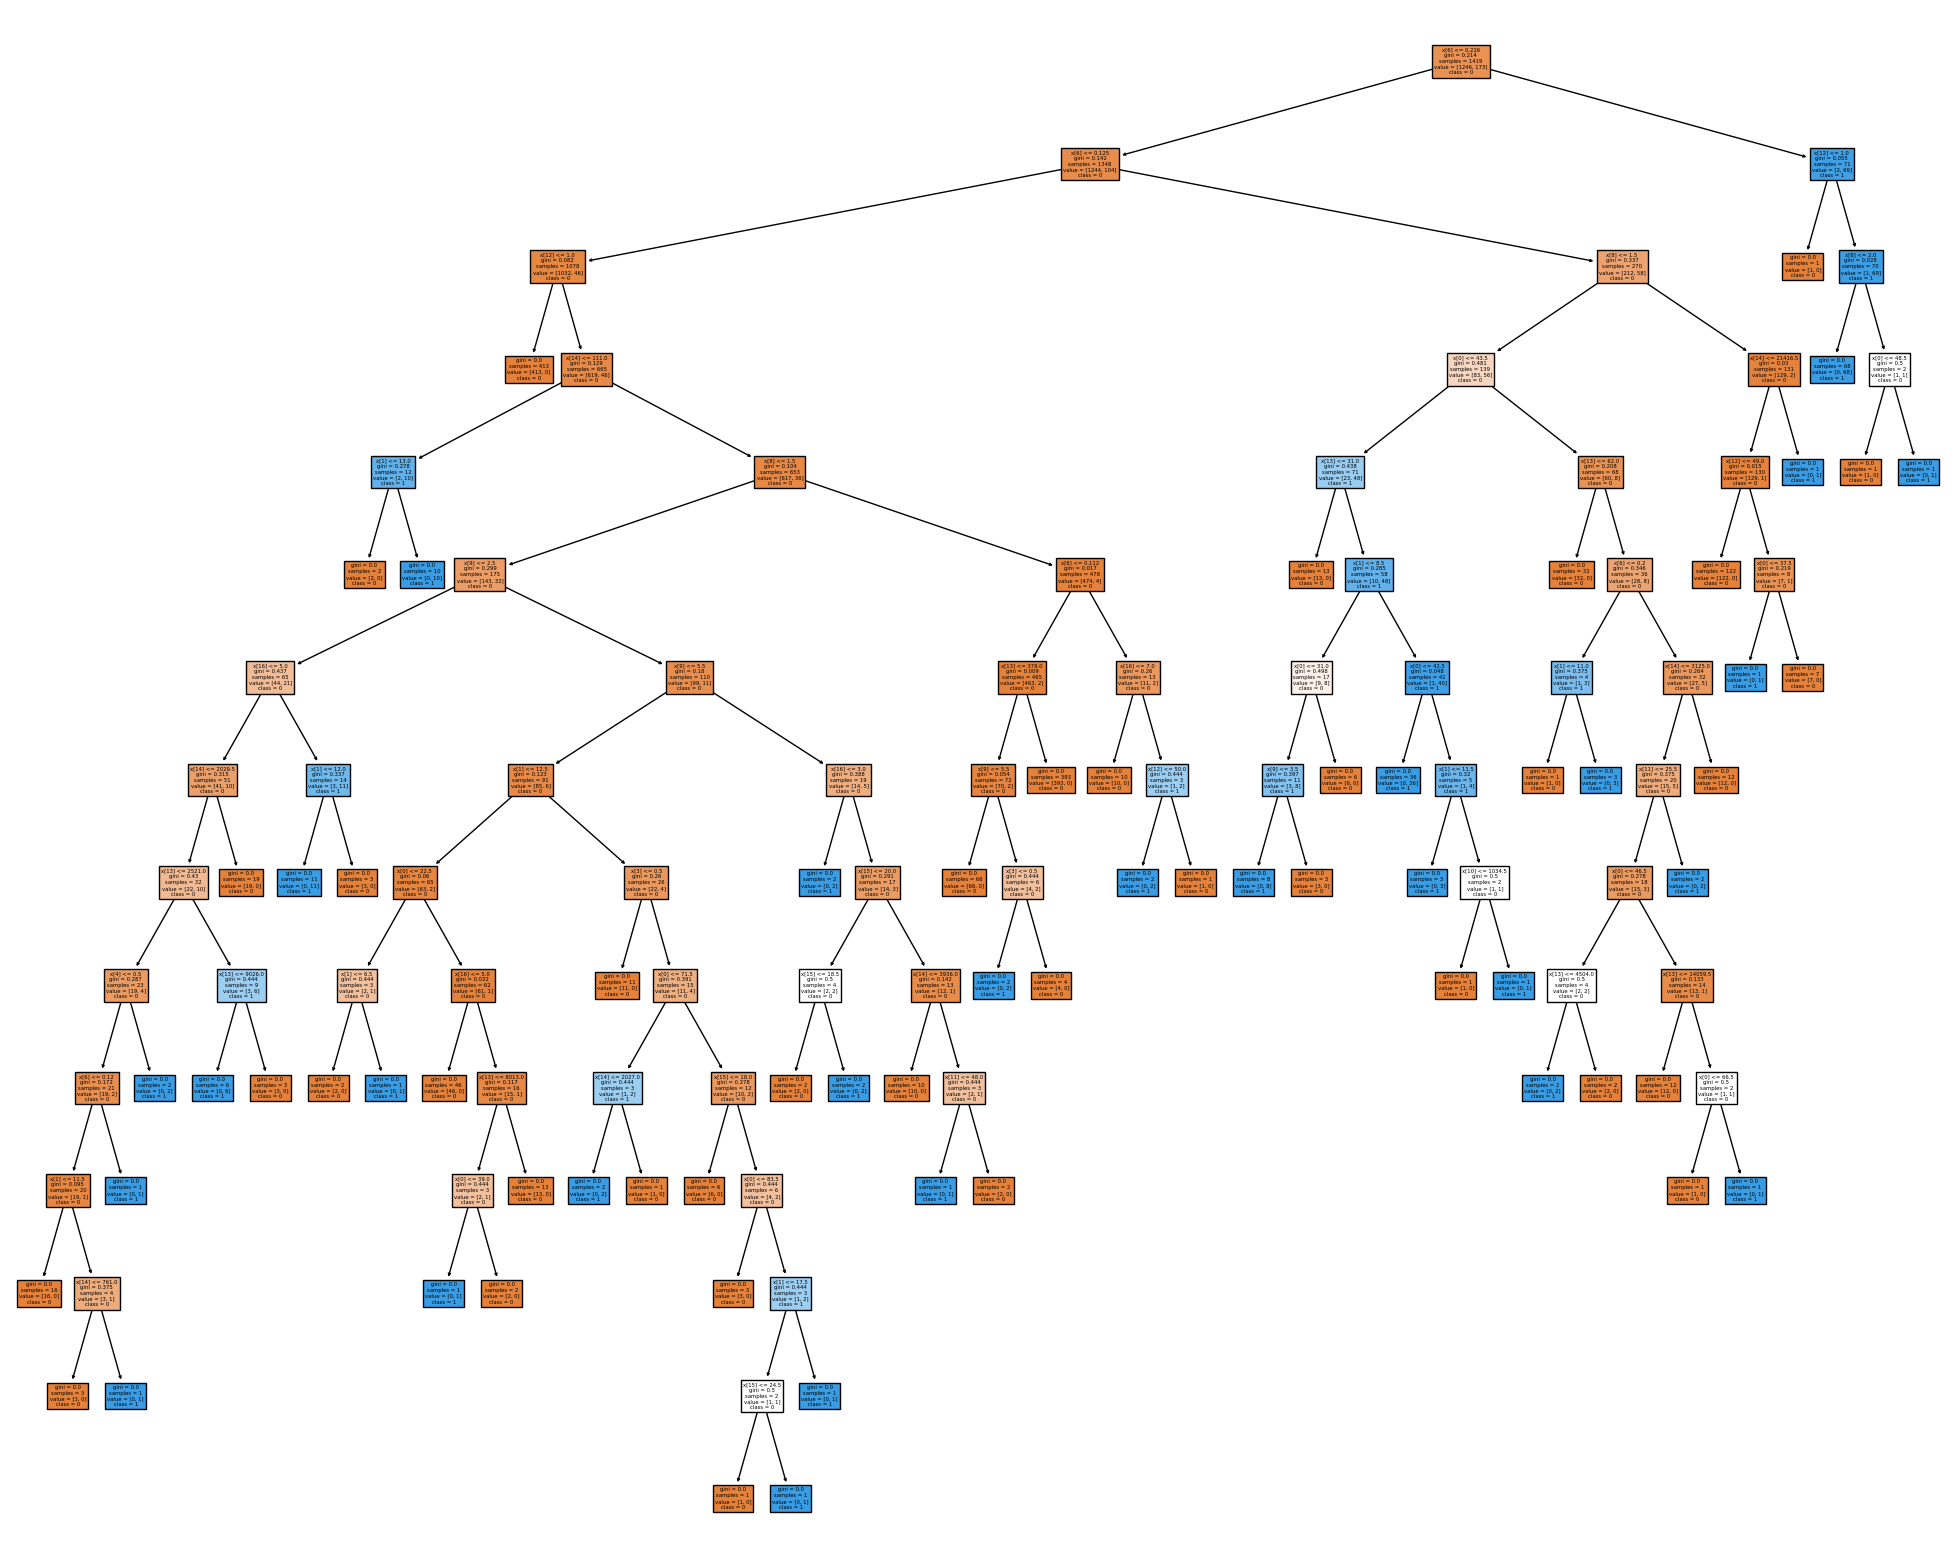

In [53]:
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(
    pipeline.named_steps["decisiontreeclassifier"], class_names=["0", "1"], filled=True
)

export model

In [55]:
joblib.dump(pipeline, "../models/Decisiontree.pkl")

['../models/Decisiontree.pkl']

In [56]:
joblib.load("../models/Decisiontree.pkl").predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,